### **MNIST MLP with Keras**

This is a template of an MNIST classifier with an Artificial Neural Network (MLP)
If follows the basic blocks of a Deep Learning classifier

This version is prepared to run in colab or locally (to run it locally start in the imports cell)

<a target="_blank" href="https://colab.research.google.com/github/nerealegui/DL-course/blob/main/00_MNIST_MLP_Keras.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install tensorflow==2.17.1
!pip install keras==3.6.0
!pip install session_info

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.17.1 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.17.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: keras


In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.layers import ReLU, Dense, Softmax
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import sys
sys.stderr = open('err.txt', 'w')



In [6]:
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()
gpu_devices = [device for device in devices if device.device_type == 'GPU']
for gpu in gpu_devices:
    print('Using', gpu.physical_device_desc)

In [34]:
# Hyperparameters

num_classes = 10  # this is the number of digits
num_epochs = 200
batch_size = 100
learning_rate = 0.001

#### **Reading MNIST Dataset**
Most frameworks offer an easy way to download the MNIST dataset. In this case we use the datasets method

This is the way that Keras reads the dataset



In [35]:
# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [36]:
type(x_train)
# The loaded data are numpy arrays

numpy.ndarray

In [37]:
# Data Preprocessing
# Preprocess the data (flattening and normalization)
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#### **ANN architecture definition**
This is the key part of the notebook, in this cell we define the structure of the network
and all the different elements mainly

- Activation function
- Layer size
- Number of layers

In this example you have a simple model with a hidden layer of 10 neurons. How good will it be?

In [38]:
# MLP Model 1 hidden layer input size 784, output layer 10 (num of classes)
# ANN sizing details
hidden_size = 250

inputs = Input(shape= (784,))
x = Dense(hidden_size)(inputs)
x = ReLU()(x)
x = Dense(10)(x)
output = Softmax()(x)

model = Model(inputs=inputs, outputs=output)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 250)                 │         196,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_4 (Softmax)                  │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,760 (776.41 KB)

 Trainable params: 198,760 (776.41 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='SGD',
              loss='MeanSquaredError',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2)

Epoch 1/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0663 - loss: 0.0923 - val_accuracy: 0.1424 - val_loss: 0.0902
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1817 - loss: 0.0893 - val_accuracy: 0.2563 - val_loss: 0.0873
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2797 - loss: 0.0864 - val_accuracy: 0.3218 - val_loss: 0.0841
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3453 - loss: 0.0832 - val_accuracy: 0.3880 - val_loss: 0.0807
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4071 - loss: 0.0797 - val_accuracy: 0.4580 - val_loss: 0.0771
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4725 - loss: 0.0762 - val_accuracy: 0.5227 - val_loss: 0.0734
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5285 - loss: 0.0724 - val_accuracy: 0.5803 - val_loss: 0.0695
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5831 - loss: 0.0685 - val_accu

In [40]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 - 1s - 2ms/step - accuracy: 0.9119 - loss: 0.0144
Test accuracy: 91.19%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


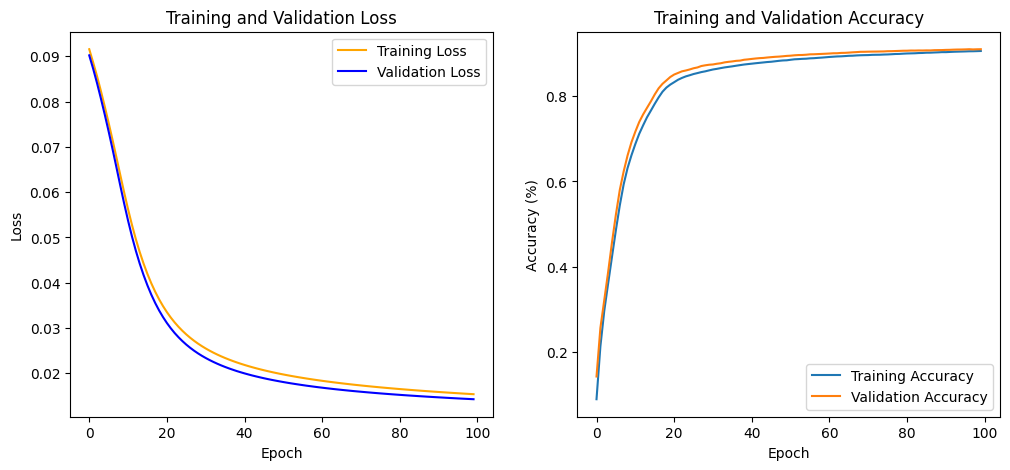

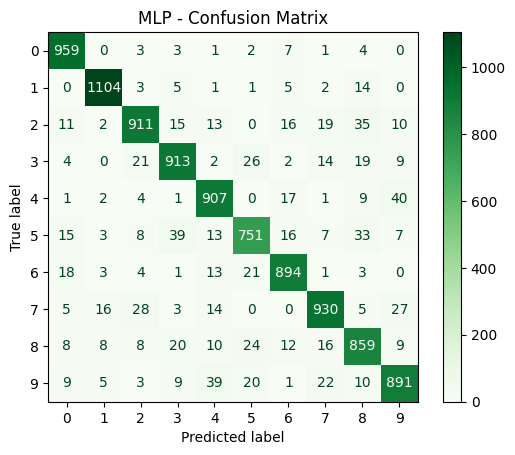

In [41]:
# Plot training loss, accuracy and confussion matrix
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

# Confusion Matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=range(num_classes))
cmd.plot(cmap=plt.cm.Greens)
plt.title(f"MLP - Confusion Matrix")

plt.show()

In [ ]:
import session_info
session_info.show(html=False)

-----
keras               3.6.0
matplotlib          3.9.2
numpy               1.26.4
session_info        1.0.0
sklearn             1.5.2
tensorflow          2.17.1
-----
IPython             8.28.0
jupyter_client      8.6.3
jupyter_core        5.7.2
-----
Python 3.12.3 (main, Jan 17 2025, 18:03:48) [GCC 13.3.0]
Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39
-----
Session information updated at 2025-02-03 08:51


#